<a href="https://colab.research.google.com/github/debargha12/DecisionTreeOnCarEvaluationDataset/blob/master/SciKitLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U imbalanced-learn

!git clone --recursive https://github.com/dmlc/xgboost

!pip3 install xgboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.5.0)
fatal: destination path 'xgboost' already exists and is not an empty directory.


(345, 7)
    mcv  alkphos  sgpt  sgot  gammagt  drinks  selector
0    85       92    45    27       31     0.0         1
1    85       64    59    32       23     0.0         2
2    86       54    33    16       54     0.0         2
3    91       78    34    24       36     0.0         2
4    87       70    12    28       10     0.0         2
5    98       55    13    17       17     0.0         2
6    88       62    20    17        9     0.5         1
7    88       67    21    11       11     0.5         1
8    92       54    22    20        7     0.5         1
9    90       60    25    19        5     0.5         1
10   89       52    13    24       15     0.5         1
11   82       62    17    17       15     0.5         1
12   90       64    61    32       13     0.5         1
13   86       77    25    19       18     0.5         1
14   96       67    29    20       11     0.5         1
15   91       78    20    31       18     0.5         1
16   89       67    23    16       10  

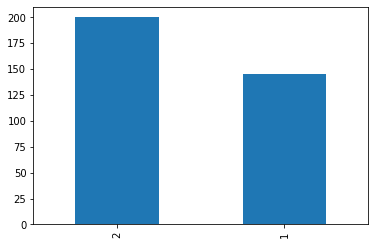

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data', header=None, delimiter=',', names=['mcv','alkphos','sgpt','sgot','gammagt','drinks','selector'])
print(df.shape)
print(df.head(20))
pd.value_counts(df['selector']).plot.bar()

In [0]:
x = df.drop(columns=['selector'])
le = preprocessing.LabelEncoder()
y = df['selector'].copy()
le.fit(y)
y=le.transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
scaler = preprocessing.MinMaxScaler().fit(x_train)
x_train=scaler.transform(x_train) 
x_test=scaler.transform(x_test)




In [0]:
#initializations 
names = [ "SVM","Decision Tree", "Neural Net", "Gaussian Naive Bayes", "Logistic Regression", "k-Nearest Neighbors",
         "Bagging", "Random Forest", "AdaBoost ", "Gradient Boosting ", "XGBoost "]
avg_Precision=[]
avg_recall=[]
avg_F1_score=[]
accuracy_list = []
best_parameters=[]

In [0]:
# SVM
tuned_parameters = [{'kernel': ['rbf','linear','sigmoid'], 'gamma': [1e-2,1e-3, 1e-4,0.1], 'C': [1, 10,50, 100, 1000],'max_iter' :[-1, 10,100],'random_state':[None,2,20],'degree':[3,5,7]}]
            
clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'C': 50, 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'random_state': None}

Detailed classification report:
{'0': {'precision': 0.676923076923077, 'recall': 0.5866666666666667, 'f1-score': 0.6285714285714286, 'support': 75}, '1': {'precision': 0.7129629629629629, 'recall': 0.7857142857142857, 'f1-score': 0.7475728155339806, 'support': 98}, 'accuracy': 0.6994219653179191, 'macro avg': {'precision': 0.69494301994302, 'recall': 0.6861904761904762, 'f1-score': 0.6880721220527046, 'support': 173}, 'weighted avg': {'precision': 0.6973387349109893, 'recall': 0.6994219653179191, 'f1-score': 0.6959826188739147, 'support': 173}}


In [0]:
# Decision Tree
tuned_parameters = { 'max_depth':[None,6,10,12,14],'min_samples_split':[0.1,0.2,0.4,0.6], 'min_samples_leaf':[1,2,3,4], 'min_weight_fraction_leaf':[0.0,0.2,0.3,0.4]}    

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'min_weight_fraction_leaf': 0.2}

Detailed classification report:
{'0': {'precision': 0.78125, 'recall': 0.3333333333333333, 'f1-score': 0.46728971962616817, 'support': 75}, '1': {'precision': 0.6453900709219859, 'recall': 0.9285714285714286, 'f1-score': 0.7615062761506277, 'support': 98}, 'accuracy': 0.6705202312138728, 'macro avg': {'precision': 0.713320035460993, 'recall': 0.6309523809523809, 'f1-score': 0.614397997888398, 'support': 173}, 'weighted avg': {'precision': 0.704288884106096, 'recall': 0.6705202312138728, 'f1-score': 0.6339557458654574, 'support': 173}}


In [0]:
# Neural Network
tuned_parameters =  {'hidden_layer_sizes':[(10,9),(3,2,4)],'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                     'learning_rate' : ['adaptive','constant', 'invscaling'],'early_stopping':[True,False],'learning_rate_init': [0.1,0.001,0.13,0.2,0.15]}
              

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'activation': 'identity', 'early_stopping': False, 'hidden_layer_sizes': (10, 9), 'learning_rate': 'constant', 'learning_rate_init': 0.1}

Detailed classification report:
{'0': {'precision': 0.6197183098591549, 'recall': 0.5866666666666667, 'f1-score': 0.6027397260273973, 'support': 75}, '1': {'precision': 0.696078431372549, 'recall': 0.7244897959183674, 'f1-score': 0.71, 'support': 98}, 'accuracy': 0.6647398843930635, 'macro avg': {'precision': 0.6578983706158519, 'recall': 0.655578231292517, 'f1-score': 0.6563698630136987, 'support': 173}, 'weighted avg': {'precision': 0.6629743324505574, 'recall': 0.6647398843930635, 'f1-score': 0.6634998812257503, 'support': 173}}


In [0]:
# Gaussian Naive Bayes
tuned_parameters =  {'priors':[None,[0.2,0.8],[0.1,0.9],[0.15,0.85],[0.18,0.82]]}
              

clf = GridSearchCV(GaussianNB(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'priors': [0.1, 0.9]}

Detailed classification report:
{'0': {'precision': 1.0, 'recall': 0.013333333333333334, 'f1-score': 0.02631578947368421, 'support': 75}, '1': {'precision': 0.5697674418604651, 'recall': 1.0, 'f1-score': 0.7259259259259259, 'support': 98}, 'accuracy': 0.5722543352601156, 'macro avg': {'precision': 0.7848837209302326, 'recall': 0.5066666666666667, 'f1-score': 0.376120857699805, 'support': 173}, 'weighted avg': {'precision': 0.756284446834252, 'recall': 0.5722543352601156, 'f1-score': 0.42262673382235294, 'support': 173}}


In [0]:
#Logistic Regression
tuned_parameters =  {'penalty':['l1','l2'],'tol':[1e-4,1e-3,1e-5,1e-2],'C':[1,10,100],'fit_intercept':[True,False]}
      

clf = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'C': 100, 'fit_intercept': True, 'penalty': 'l1', 'tol': 0.0001}

Detailed classification report:
{'0': {'precision': 0.6515151515151515, 'recall': 0.5733333333333334, 'f1-score': 0.6099290780141844, 'support': 75}, '1': {'precision': 0.7009345794392523, 'recall': 0.7653061224489796, 'f1-score': 0.7317073170731707, 'support': 98}, 'accuracy': 0.6820809248554913, 'macro avg': {'precision': 0.6762248654772018, 'recall': 0.6693197278911565, 'f1-score': 0.6708181975436776, 'support': 173}, 'weighted avg': {'precision': 0.6795099719577057, 'recall': 0.6820809248554913, 'f1-score': 0.6789132827990436, 'support': 173}}


In [0]:
# k-Nearest Neighbors

tuned_parameters =  {'n_neighbors':[3,4,5],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2,3], 'n_jobs':[1]}
      

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Detailed classification report:
{'0': {'precision': 0.5915492957746479, 'recall': 0.56, 'f1-score': 0.5753424657534246, 'support': 75}, '1': {'precision': 0.6764705882352942, 'recall': 0.7040816326530612, 'f1-score': 0.69, 'support': 98}, 'accuracy': 0.6416184971098265, 'macro avg': {'precision': 0.634009942004971, 'recall': 0.6320408163265306, 'f1-score': 0.6326712328767123, 'support': 173}, 'weighted avg': {'precision': 0.639654999018251, 'recall': 0.6416184971098265, 'f1-score': 0.6402929764826985, 'support': 173}}


In [0]:
# Bagging
tuned_parameters =  {'base_estimator':[DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=1)],'n_estimators':[5,10]
                     ,'max_samples':[0.5,1,2],'max_features':[0.5,1,2],'random_state':[0,20,45],'bootstrap':[True,False]}


clf = GridSearchCV(BaggingClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)


Best parameters set found on development set:

{'base_estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), 'bootstrap': True, 'max_features': 1, 'max_samples': 0.5, 'n_estimators': 5, 'random_state': 0}

Detailed classification report:
{'0': {'precision': 0.45454545454545453, 'recall': 0.4666666666666667, 'f1-score': 0.46052631578947373, 'support': 75}, '1': {'precision': 0.5833333333333334, 'recall': 0.5714285714285714, 'f1-score': 0.577319587628866, 'support': 98}, 'accuracy': 0.5260115606936416, 'macro avg': {'precision': 0.5189393939393939, 'recall': 0.519047619047619, 'f1-score': 0.5189229517091699, 'support': 173}, 'weighted avg': {'precision': 0.5275004379050622, 'recall': 0.5260115606936416, 'f1-score': 0.5266866663112104, 'support': 173}}


In [0]:
# Random Forest

tuned_parameters =  {'n_estimators':[10,50,100,200],'max_depth':[None,5,7,10]
                     ,'criterion':['gini', 'entropy'],'max_features':[0.5,1,2]}



clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'n_estimators': 10}

Detailed classification report:
{'0': {'precision': 0.7083333333333334, 'recall': 0.4533333333333333, 'f1-score': 0.5528455284552846, 'support': 75}, '1': {'precision': 0.672, 'recall': 0.8571428571428571, 'f1-score': 0.7533632286995515, 'support': 98}, 'accuracy': 0.6820809248554913, 'macro avg': {'precision': 0.6901666666666667, 'recall': 0.6552380952380952, 'f1-score': 0.653104378577418, 'support': 173}, 'weighted avg': {'precision': 0.6877514450867053, 'recall': 0.6820809248554913, 'f1-score': 0.6664335898653317, 'support': 173}}


In [0]:
# AdaBoost Classifier

tuned_parameters =  {'n_estimators':[10,50,100],'learning_rate':[0.1,0.2,0.4]
                     ,'algorithm':['SAMME', 'SAMME.R'],'random_state':[5,15,20]}

clf = GridSearchCV(AdaBoostClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 5}

Detailed classification report:
{'0': {'precision': 0.6181818181818182, 'recall': 0.4533333333333333, 'f1-score': 0.5230769230769231, 'support': 75}, '1': {'precision': 0.652542372881356, 'recall': 0.7857142857142857, 'f1-score': 0.7129629629629629, 'support': 98}, 'accuracy': 0.6416184971098265, 'macro avg': {'precision': 0.6353620955315871, 'recall': 0.6195238095238095, 'f1-score': 0.618019943019943, 'support': 173}, 'weighted avg': {'precision': 0.6376461786474523, 'recall': 0.6416184971098265, 'f1-score': 0.6306424254401133, 'support': 173}}


In [0]:
# GradientBoostingClassifier

tuned_parameters =  {'n_estimators':[10,50,80,100],'learning_rate':[0.1,0.2,0.4,0.7]
                     ,'min_impurity_decrease':[0,0.5,1],'max_depth':[3,5,15,20]}


clf = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'learning_rate': 0.4, 'max_depth': 3, 'min_impurity_decrease': 0, 'n_estimators': 100}

Detailed classification report:
{'0': {'precision': 0.5857142857142857, 'recall': 0.5466666666666666, 'f1-score': 0.5655172413793104, 'support': 75}, '1': {'precision': 0.6699029126213593, 'recall': 0.7040816326530612, 'f1-score': 0.6865671641791046, 'support': 98}, 'accuracy': 0.6358381502890174, 'macro avg': {'precision': 0.6278085991678225, 'recall': 0.6253741496598639, 'f1-score': 0.6260422027792074, 'support': 173}, 'weighted avg': {'precision': 0.6334049529795643, 'recall': 0.6358381502890174, 'f1-score': 0.63408887394798, 'support': 173}}


In [0]:
# XGBoost
tuned_parameters =  {'n_estimators':[10,50,100,150],'learning_rate':[0.001,0.1,0.2,0.4]
                     ,'booster':['gbtree','gblinear','dart'],'max_delta_step':[0,0.01,0.02]}


clf = GridSearchCV(XGBClassifier(), tuned_parameters, cv=5,
                    scoring='accuracy' )
clf.fit(x_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
best_parameters.append(clf.best_params_)
print()
print("Detailed classification report:")

y_true, y_pred = y_test, clf.predict(x_test)
results=classification_report(y_true, y_pred,output_dict=True)
avg_Precision.append(results['macro avg']['precision'])
avg_recall.append(results['macro avg']['recall'])
avg_F1_score.append(results['macro avg']['f1-score'])
accuracy_list.append(results['accuracy'])
print(results)

Best parameters set found on development set:

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_delta_step': 0, 'n_estimators': 50}

Detailed classification report:
{'0': {'precision': 0.7450980392156863, 'recall': 0.5066666666666667, 'f1-score': 0.6031746031746031, 'support': 75}, '1': {'precision': 0.6967213114754098, 'recall': 0.8673469387755102, 'f1-score': 0.7727272727272727, 'support': 98}, 'accuracy': 0.7109826589595376, 'macro avg': {'precision': 0.7209096753455481, 'recall': 0.6870068027210885, 'f1-score': 0.6879509379509379, 'support': 173}, 'weighted avg': {'precision': 0.7176938813050094, 'recall': 0.7109826589595376, 'f1-score': 0.6992217801466356, 'support': 173}}


In [0]:
#output

d={'Algorithm':names, 'Best Parameters':best_parameters, 'Avg Precision':avg_Precision,
   'Avg Recall': avg_recall, 'Avg F1': avg_F1_score, 'Accuracy':accuracy_list}
output=pd.DataFrame(data=d)
output.style.set_properties(**{'background-color': 'white',
                           'color': 'black'})
print(output.to_string())



               Algorithm                                    Best Parameters  Avg Precision  Avg Recall    Avg F1  Accuracy
0                    SVM  {'C': 50, 'degree': 3, 'gamma': 0.01, 'kernel'...       0.694943    0.686190  0.688072  0.699422
1          Decision Tree  {'max_depth': None, 'min_samples_leaf': 1, 'mi...       0.713320    0.630952  0.614398  0.670520
2             Neural Net  {'activation': 'identity', 'early_stopping': F...       0.657898    0.655578  0.656370  0.664740
3   Gaussian Naive Bayes                             {'priors': [0.1, 0.9]}       0.784884    0.506667  0.376121  0.572254
4    Logistic Regression  {'C': 100, 'fit_intercept': True, 'penalty': '...       0.676225    0.669320  0.670818  0.682081
5    k-Nearest Neighbors  {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbor...       0.634010    0.632041  0.632671  0.641618
6                Bagging  {'base_estimator': KNeighborsClassifier(algori...       0.518939    0.519048  0.518923  0.526012
7          Rando